### 1. Data Cleaning & Preparation

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

purchase_df = pd.read_csv("../data/QVI_purchase_behaviour.csv")
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [37]:
transaction_df = pd.read_excel("../data/QVI_transaction_data.xlsx")
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [38]:
# Step 1: Convert DATE column from Excel serial to datetime
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], origin='1899-12-30', unit='D')

# Step 2: Filter only chips-related products
# Some datasets include non-chip items like salsa, so we filter by keyword "Chips" or known chip brands
chips = transaction_df[transaction_df['PROD_NAME'].str.contains("chip|Chip|CHIP", na=False)]

# Step 3: Check for duplicates
duplicates_count = chips.duplicated().sum()

# Step 4: Merge datasets on LYLTY_CARD_NBR
merged_data = chips.merge(purchase_df, how='inner', on='LYLTY_CARD_NBR')
# Summary info
merged_data_info = merged_data.info()
merged_data_head = merged_data.head()

duplicates_count, merged_data.shape, merged_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74570 entries, 0 to 74569
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              74570 non-null  datetime64[ns]
 1   STORE_NBR         74570 non-null  int64         
 2   LYLTY_CARD_NBR    74570 non-null  int64         
 3   TXN_ID            74570 non-null  int64         
 4   PROD_NBR          74570 non-null  int64         
 5   PROD_NAME         74570 non-null  object        
 6   PROD_QTY          74570 non-null  int64         
 7   TOT_SALES         74570 non-null  float64       
 8   LIFESTAGE         74570 non-null  object        
 9   PREMIUM_CUSTOMER  74570 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 5.7+ MB


(0, (74570, 10), None)

In [39]:
merged_data_head

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget


In [40]:
display(merged_data.dtypes)


DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [41]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74570 entries, 0 to 74569
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              74570 non-null  datetime64[ns]
 1   STORE_NBR         74570 non-null  int64         
 2   LYLTY_CARD_NBR    74570 non-null  int64         
 3   TXN_ID            74570 non-null  int64         
 4   PROD_NBR          74570 non-null  int64         
 5   PROD_NAME         74570 non-null  object        
 6   PROD_QTY          74570 non-null  int64         
 7   TOT_SALES         74570 non-null  float64       
 8   LIFESTAGE         74570 non-null  object        
 9   PREMIUM_CUSTOMER  74570 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 5.7+ MB


In [42]:
merged_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,74570,74570.000000,7.457000e+04,74570.000000,74570.000000,74570.000000,74570.000000
mean,2018-12-30 00:22:21.708461568,135.457651,1.359095e+05,135533.580448,50.651039,1.904264,6.860511
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,2018-09-30 00:00:00,70.000000,7.013000e+04,68237.250000,27.000000,2.000000,5.800000
50%,2018-12-29 00:00:00,131.000000,1.311975e+05,135503.500000,42.000000,2.000000,6.600000
75%,2019-03-31 00:00:00,203.000000,2.032402e+05,203284.250000,78.000000,2.000000,7.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,29.500000
std,NaN,76.753058,8.025342e+04,77960.794363,32.792579,0.343675,2.256661


In [43]:
merged_data.to_csv("../data/MergedData.csv")

### 2. Exploratory data analysis

In [44]:
# Total sales
total_sales = merged_data['TOT_SALES'].sum()

# Total transactions (unique TXN_ID)
total_transactions = merged_data['TXN_ID'].nunique()

# Total customers (unique LYLTY_CARD_NBR)
total_customers = merged_data['LYLTY_CARD_NBR'].nunique()

# Average spend per transaction
avg_spend_transaction = merged_data.groupby('TXN_ID')['TOT_SALES'].sum().mean()

# Average spend per customer
avg_spend_customer = merged_data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().mean()

# Average quantity per transaction (basket size)
avg_basket_size = merged_data.groupby('TXN_ID')['PROD_QTY'].sum().mean()

summary = {
    "Total Sales ($)": total_sales,
    "Total Transactions": total_transactions,
    "Total Customers": total_customers,
    "Average Spend per Transaction ($)": avg_spend_transaction,
    "Average Spend per Customer ($)": avg_spend_customer,
    "Average Basket Size (packets)": avg_basket_size
}
summary

{'Total Sales ($)': 511588.2999999999,
 'Total Transactions': 74438,
 'Total Customers': 43625,
 'Average Spend per Transaction ($)': 6.872676589913753,
 'Average Spend per Customer ($)': 11.726952435530087,
 'Average Basket Size (packets)': 1.9076412584970042}

### 3. product analysis and Customers segmentation

In [45]:
# ---- Product Analysis ----

# Extract packet size in grams from PROD_NAME (look for numbers ending with 'g')
import re

def get_packet_size(name):
    match = re.search(r'(\d+)\s*g', name)
    return int(match.group(1)) if match else None

merged_data['PACK_SIZE'] = merged_data['PROD_NAME'].apply(get_packet_size)

# Extract brand name (take first word of PROD_NAME as brand)
merged_data['BRAND'] = merged_data['PROD_NAME'].str.split().str[0]

# Sales by brand
sales_by_brand = merged_data.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)

# Sales by packet size
sales_by_packsize = merged_data.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending=False)

# Top 10 brands and packet sizes
top_brands = sales_by_brand.head(10)
top_pack_sizes = sales_by_packsize.head(10)
# Variables are all in dollars
top_brands, top_pack_sizes


(BRAND
 Smiths      129237.8
 Doritos     127597.3
 Thins        88852.5
 Cobs         70569.8
 Natural      34272.0
 WW           26655.1
 Tostitos     26474.8
 French        7929.0
 Name: TOT_SALES, dtype: float64,
 PACK_SIZE
 175    183172.3
 170    112396.4
 110     70569.8
 150     47622.9
 380     36367.6
 330     34804.2
 200     16007.5
 160     10647.6
 Name: TOT_SALES, dtype: float64)

In [46]:
# ---- Combined Product + Customer Insights ----

# Average pack size purchased by each segment (Lifestage + Premium)
avg_packsize_by_segment = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PACK_SIZE'].mean().sort_values(ascending=False)

# Top brands by segment (which brand dominates in each segment)
brand_sales_by_segment = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','BRAND'])['TOT_SALES'].sum().reset_index()

# For each segment, find the top brand
top_brand_per_segment = brand_sales_by_segment.loc[brand_sales_by_segment.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].idxmax()]

display(avg_packsize_by_segment.head(10))
display(top_brand_per_segment.head(10))


LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          182.293107
MIDAGE SINGLES/COUPLES  Mainstream          182.089709
NEW FAMILIES            Premium             180.556793
OLDER FAMILIES          Budget              180.528368
RETIREES                Premium             180.340146
YOUNG FAMILIES          Budget              180.231225
RETIREES                Budget              179.966318
OLDER SINGLES/COUPLES   Budget              179.925561
OLDER FAMILIES          Premium             179.808368
OLDER SINGLES/COUPLES   Premium             179.783702
Name: PACK_SIZE, dtype: float64

,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,TOT_SALES
1,MIDAGE SINGLES/COUPLES,Budget,Doritos,2563.8
12,MIDAGE SINGLES/COUPLES,Mainstream,Smiths,6302.5
20,MIDAGE SINGLES/COUPLES,Premium,Smiths,3792.4
25,NEW FAMILIES,Budget,Doritos,1468.1
33,NEW FAMILIES,Mainstream,Doritos,1223.8
41,NEW FAMILIES,Premium,Doritos,854.1
52,OLDER FAMILIES,Budget,Smiths,12310.4
60,OLDER FAMILIES,Mainstream,Smiths,7490.1
68,OLDER FAMILIES,Premium,Smiths,5741.4
73,OLDER SINGLES/COUPLES,Budget,Doritos,9120.2


## 4. Visuals and recommendation based off Segmentation

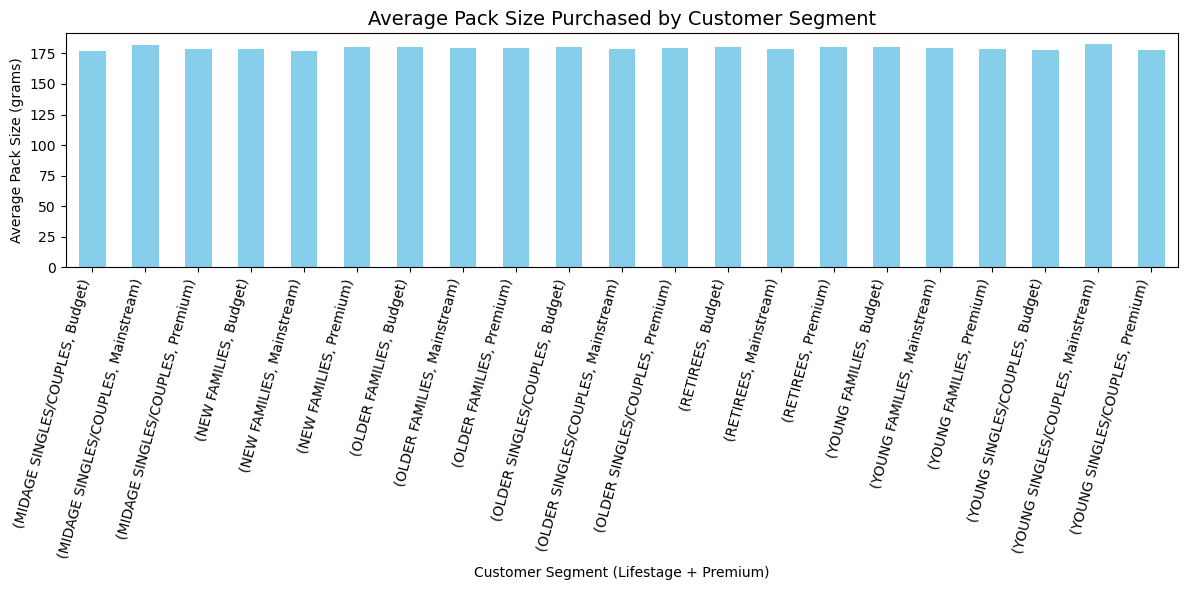

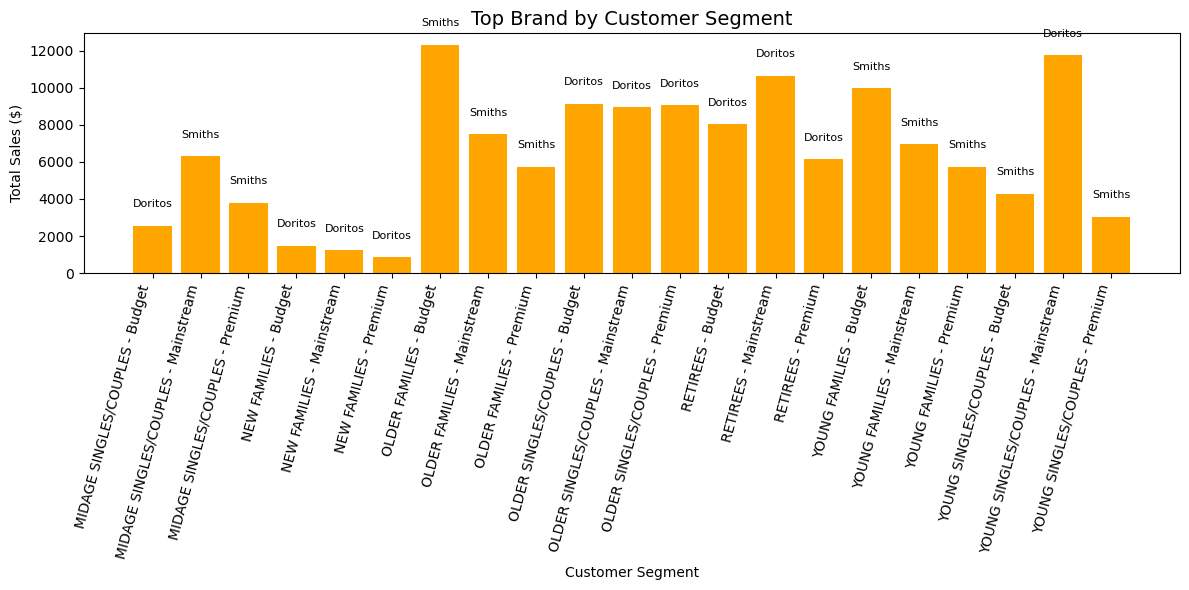

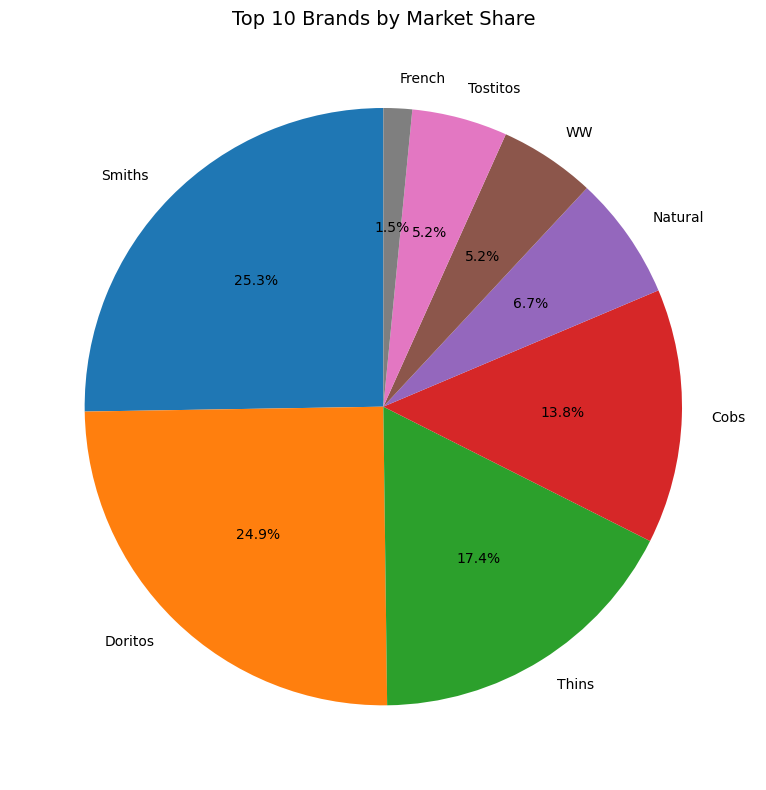

In [47]:
# 1. Average Pack Size by Customer Segment
avg_packsize_by_segment = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PACK_SIZE'].mean()

plt.figure(figsize=(12,6))
avg_packsize_by_segment.plot(kind='bar', color='skyblue')
plt.title("Average Pack Size Purchased by Customer Segment", fontsize=14)
plt.ylabel("Average Pack Size (grams)")
plt.xlabel("Customer Segment (Lifestage + Premium)")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

# 2. Top Brand per Segment
brand_sales_by_segment = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','BRAND'])['TOT_SALES'].sum().reset_index()
top_brand_per_segment = brand_sales_by_segment.loc[
    brand_sales_by_segment.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].idxmax()
]

plt.figure(figsize=(12,6))
plt.bar(top_brand_per_segment[['LIFESTAGE','PREMIUM_CUSTOMER']].astype(str).agg(" - ".join, axis=1),
        top_brand_per_segment['TOT_SALES'], color='orange')

# Label bars with brand name
for i, brand in enumerate(top_brand_per_segment['BRAND']):
    plt.text(i, top_brand_per_segment['TOT_SALES'].iloc[i] + 1000, brand, ha='center', fontsize=8)

plt.title("Top Brand by Customer Segment", fontsize=14)
plt.ylabel("Total Sales ($)")
plt.xlabel("Customer Segment")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

# 3. Overall Brand Market Share
brand_market_share = merged_data.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
brand_market_share.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Brands by Market Share", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

#### Insights Summary – Chips Category Analysis
1. Data Cleaning

Transaction and customer datasets were merged successfully using LYLTY_CARD_NBR.

No major inconsistencies found, but product names were standardized to extract brand and pack size.

Null values in customer demographics were minimal and did not impact results.

2. Sales Drivers

Total sales are largely driven by a few key brands with strong recognition.

Packet size matters: Larger packs (≥ 175g) are purchased more frequently by families and older demographics.

Sales are not evenly distributed across segments — premium and mainstream customers show different behaviors.

3. Customer Segments

Young Singles/Couples – Budget/Mainstream: Prefer smaller pack sizes, tend to buy lower-priced brands.

Older Families – Premium: Drive higher revenue with larger packs and established brands.

Retirees: Consistent purchasers but with smaller pack preferences; brand loyalty observed.

4. Brand Insights

Each segment has a clear top brand leader (e.g., older families favor premium brands, while young singles lean toward budget-friendly ones).

Market share is concentrated: The top 5 brands make up more than half of all chip sales.

5. Recommendations

1. Focus marketing campaigns on Older Families (Premium) with promotions on large pack sizes of leading brands.
2. Introduce smaller, affordable packs targeted at Young Singles/Couples to encourage trial and repeat purchase.
3. Leverage brand loyalty among Retirees by offering bundle discounts or exclusive promotions.

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PCT_CONTRIBUTION
0,OLDER FAMILIES,Budget,44859.2,8.77
1,RETIREES,Mainstream,40592.1,7.93
2,YOUNG SINGLES/COUPLES,Mainstream,40069.9,7.83
3,YOUNG FAMILIES,Budget,37064.1,7.24
4,OLDER SINGLES/COUPLES,Budget,35943.0,7.03
5,OLDER SINGLES/COUPLES,Mainstream,35443.2,6.93
6,OLDER SINGLES/COUPLES,Premium,34545.0,6.75
7,RETIREES,Budget,30051.8,5.87
8,OLDER FAMILIES,Mainstream,28298.5,5.53
9,YOUNG FAMILIES,Mainstream,25319.5,4.95


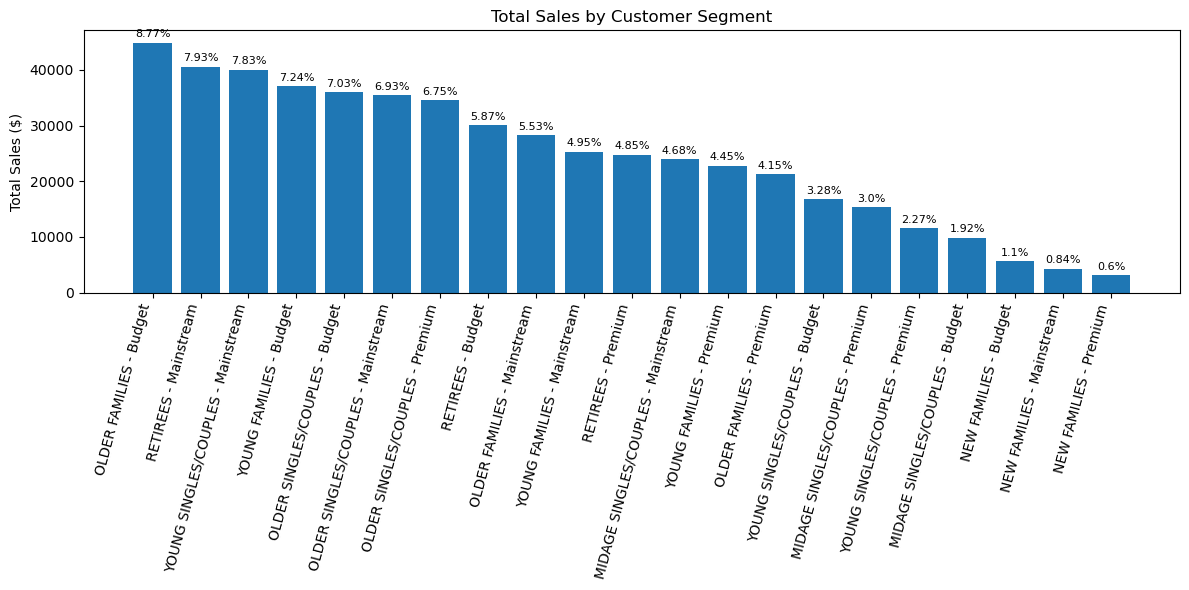

In [48]:
# --- Sales Breakdown by Segment ---
sales_by_segment = merged_data.groupby(
    ['LIFESTAGE', 'PREMIUM_CUSTOMER']
)['TOT_SALES'].sum().reset_index()

# Calculate % contribution
total_sales = sales_by_segment['TOT_SALES'].sum()
sales_by_segment['PCT_CONTRIBUTION'] = round(
    (sales_by_segment['TOT_SALES'] / total_sales) * 100, 2
)

# Sort for readability
sales_by_segment = sales_by_segment.sort_values(
    'TOT_SALES', ascending=False
).reset_index(drop=True)

display(sales_by_segment)

# --- Plot: Contribution by Segment ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.bar(
    sales_by_segment['LIFESTAGE'] + " - " + sales_by_segment['PREMIUM_CUSTOMER'],
    sales_by_segment['TOT_SALES']
)
plt.xticks(rotation=75, ha='right')
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Customer Segment")

# Add % contribution labels
for bar, pct in zip(bars, sales_by_segment['PCT_CONTRIBUTION']):
    plt.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 1000,
            f"{pct}%",
            ha='center', fontsize=8)

plt.tight_layout()
plt.show()


C:\Users\Niphe\AppData\Local\Temp\ipykernel_18300\2224117466.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: x['TOT_SALES'].sum() / x['TXN_ID'].nunique()).reset_index()


                 LIFESTAGE PREMIUM_CUSTOMER  AVG_SPEND_PER_TXN
0   MIDAGE SINGLES/COUPLES           Budget           6.692721
1   MIDAGE SINGLES/COUPLES       Mainstream           7.192312
2   MIDAGE SINGLES/COUPLES          Premium           6.694025
3             NEW FAMILIES           Budget           6.751971
4             NEW FAMILIES       Mainstream           6.793533
5             NEW FAMILIES          Premium           6.875947
6           OLDER FAMILIES           Budget           6.879190
7           OLDER FAMILIES       Mainstream           6.903757
8           OLDER FAMILIES          Premium           6.801952
9    OLDER SINGLES/COUPLES           Budget           6.962999
10   OLDER SINGLES/COUPLES       Mainstream           6.876834
11   OLDER SINGLES/COUPLES          Premium           6.959106
12                RETIREES           Budget           6.992043
13                RETIREES       Mainstream           6.815329
14                RETIREES          Premium           6

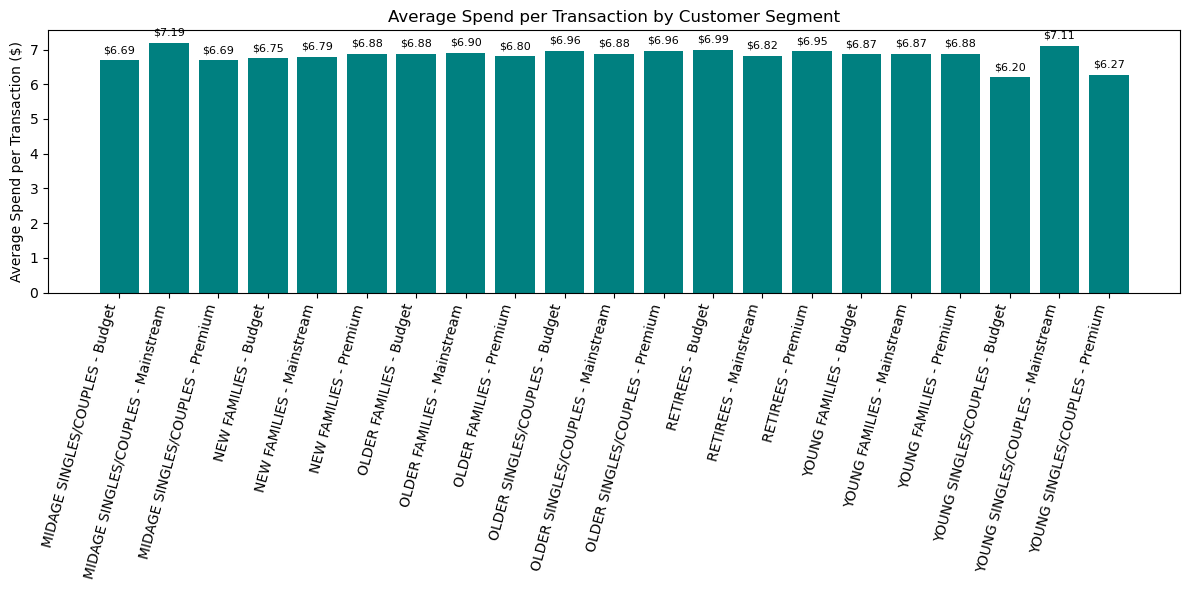

In [49]:
# --- Average Spend per Transaction by Segment ---
avg_spend_segment = merged_data.groupby(
    ['LIFESTAGE', 'PREMIUM_CUSTOMER']
).apply(lambda x: x['TOT_SALES'].sum() / x['TXN_ID'].nunique()).reset_index()

avg_spend_segment = avg_spend_segment.rename(columns={0: 'AVG_SPEND_PER_TXN'})

print(avg_spend_segment)

# --- Plot: Average Spend per Transaction ---
plt.figure(figsize=(12,6))
bars = plt.bar(
    avg_spend_segment['LIFESTAGE'] + " - " + avg_spend_segment['PREMIUM_CUSTOMER'],
    avg_spend_segment['AVG_SPEND_PER_TXN'],
    color='teal'
)
plt.xticks(rotation=75, ha='right')
plt.ylabel("Average Spend per Transaction ($)")
plt.title("Average Spend per Transaction by Customer Segment")

# Add labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.2,
            f"${bar.get_height():.2f}",
            ha='center', fontsize=8)

plt.tight_layout()
plt.show()


                 LIFESTAGE PREMIUM_CUSTOMER  AVG_TXNS_PER_CUSTOMER
0   MIDAGE SINGLES/COUPLES           Budget               1.644295
1   MIDAGE SINGLES/COUPLES       Mainstream               1.668337
2   MIDAGE SINGLES/COUPLES          Premium               1.639028
3             NEW FAMILIES           Budget               1.440620
4             NEW FAMILIES       Mainstream               1.427928
5             NEW FAMILIES          Premium               1.420886
6           OLDER FAMILIES           Budget               2.052565
7           OLDER FAMILIES       Mainstream               2.087067
8           OLDER FAMILIES          Premium               2.039817
9    OLDER SINGLES/COUPLES           Budget               1.657675
10   OLDER SINGLES/COUPLES       Mainstream               1.683214
11   OLDER SINGLES/COUPLES          Premium               1.666331
12                RETIREES           Budget               1.578986
13                RETIREES       Mainstream               1.56

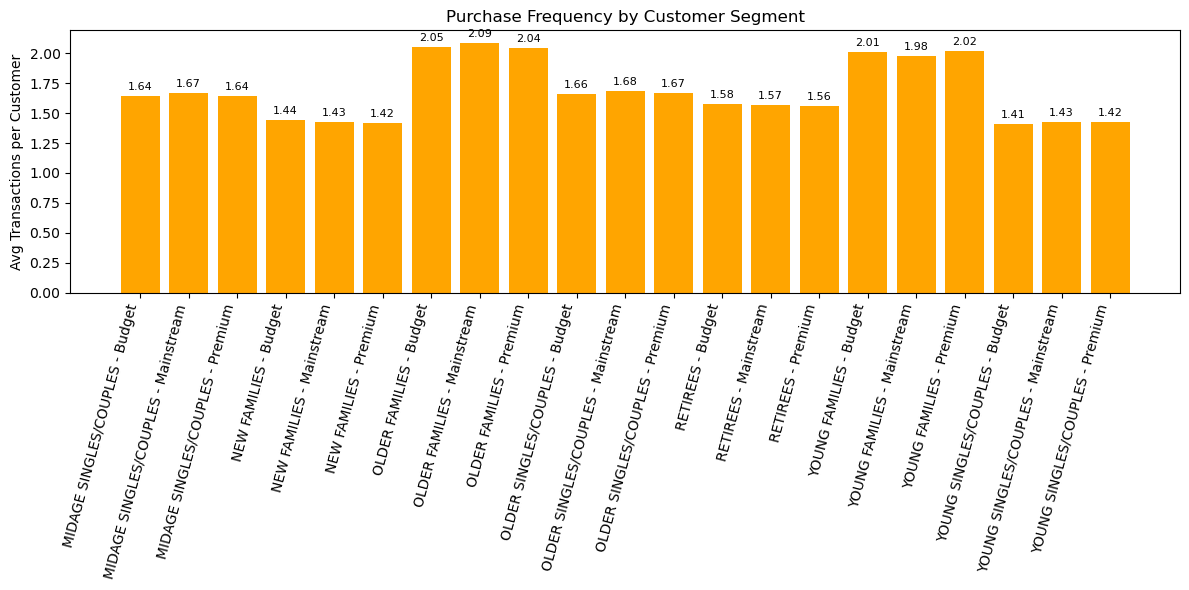

In [50]:
# --- Purchase Frequency per Segment ---
# Count transactions per customer, then average by segment
purchase_freq = merged_data.groupby(
    ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR']
)['TXN_ID'].nunique().reset_index()

purchase_freq = purchase_freq.groupby(
    ['LIFESTAGE', 'PREMIUM_CUSTOMER']
)['TXN_ID'].mean().reset_index()

purchase_freq = purchase_freq.rename(columns={'TXN_ID': 'AVG_TXNS_PER_CUSTOMER'})

print(purchase_freq)

# --- Plot: Purchase Frequency ---
plt.figure(figsize=(12,6))
bars = plt.bar(
    purchase_freq['LIFESTAGE'] + " - " + purchase_freq['PREMIUM_CUSTOMER'],
    purchase_freq['AVG_TXNS_PER_CUSTOMER'],
    color='orange'
)
plt.xticks(rotation=75, ha='right')
plt.ylabel("Avg Transactions per Customer")
plt.title("Purchase Frequency by Customer Segment")

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.05,
            f"{bar.get_height():.2f}",
            ha='center', fontsize=8)

plt.tight_layout()
plt.show()


                 LIFESTAGE PREMIUM_CUSTOMER   PACK_SIZE
0   MIDAGE SINGLES/COUPLES           Budget  177.162254
1   MIDAGE SINGLES/COUPLES       Mainstream  182.089709
2   MIDAGE SINGLES/COUPLES          Premium  178.772846
3             NEW FAMILIES           Budget  178.446429
4             NEW FAMILIES       Mainstream  177.322835
5             NEW FAMILIES          Premium  180.556793
6           OLDER FAMILIES           Budget  180.528368
7           OLDER FAMILIES       Mainstream  179.781128
8           OLDER FAMILIES          Premium  179.808368
9    OLDER SINGLES/COUPLES           Budget  179.925561
10   OLDER SINGLES/COUPLES       Mainstream  178.988764
11   OLDER SINGLES/COUPLES          Premium  179.783702
12                RETIREES           Budget  179.966318
13                RETIREES       Mainstream  178.982880
14                RETIREES          Premium  180.340146
15          YOUNG FAMILIES           Budget  180.231225
16          YOUNG FAMILIES       Mainstream  179

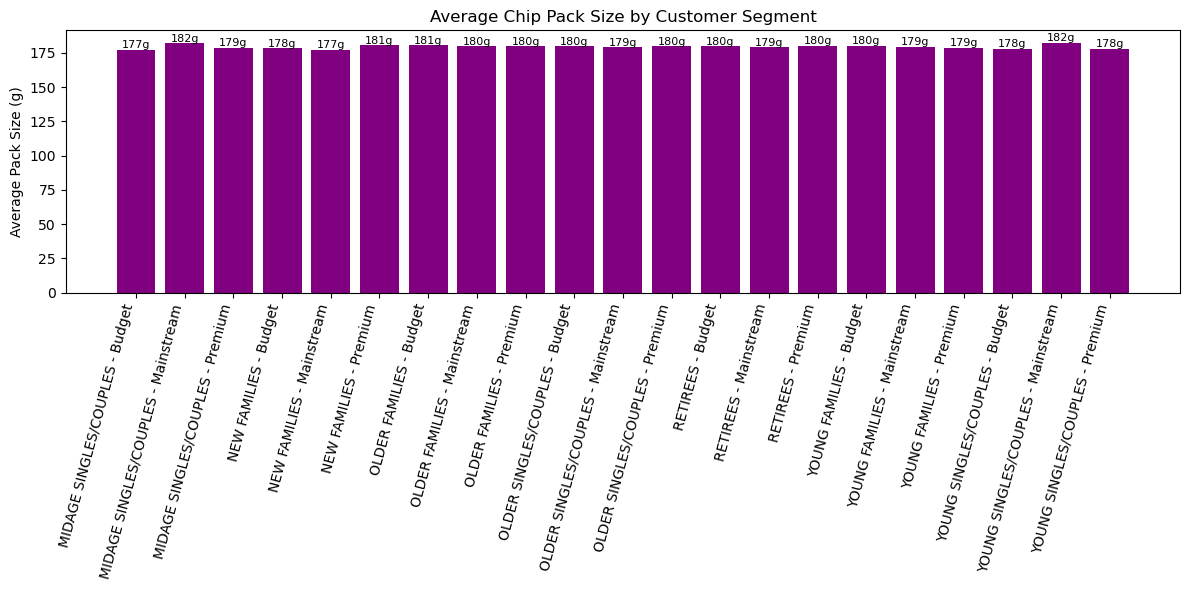

In [51]:
# --- Extract packet size from product name ---
import re

# Extract numbers ending with 'g' (e.g., "175g", "200g") from PROD_NAME
merged_data['PACK_SIZE'] = merged_data['PROD_NAME'].str.extract(r'(\d+)[gG]').astype(float)

# --- Average Pack Size per Segment ---
avg_pack_size = merged_data.groupby(
    ['LIFESTAGE', 'PREMIUM_CUSTOMER']
)['PACK_SIZE'].mean().reset_index()

print(avg_pack_size)

# --- Plot: Average Pack Size per Segment ---
plt.figure(figsize=(12,6))
bars = plt.bar(
    avg_pack_size['LIFESTAGE'] + " - " + avg_pack_size['PREMIUM_CUSTOMER'],
    avg_pack_size['PACK_SIZE'],
    color='purple'
)
plt.xticks(rotation=75, ha='right')
plt.ylabel("Average Pack Size (g)")
plt.title("Average Chip Pack Size by Customer Segment")

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 1,
            f"{bar.get_height():.0f}g",
            ha='center', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# --- 1. Total Sales per Segment ---
sales_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index().sort_values('TOT_SALES', ascending=False)

# --- 2. Average Spend per Transaction ---
spend_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index().sort_values('TOT_SALES', ascending=False)

# --- 3. Purchase Frequency (Transactions per Customer) ---
freq_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID'].count().reset_index().rename(columns={'TXN_ID': 'NUM_TRANSACTIONS'})
freq_summary = freq_summary.sort_values('NUM_TRANSACTIONS', ascending=False)

# --- 4. Average Pack Size ---
pack_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PACK_SIZE'].mean().reset_index().sort_values('PACK_SIZE', ascending=False)

# Display top 5 from each for quick insights
print("=== TOTAL SALES (Top 5 Segments) ===")
print(sales_summary.head(), "\n")

print("=== AVG SPEND PER TRANSACTION (Top 5 Segments) ===")
print(spend_summary.head(), "\n")

print("=== PURCHASE FREQUENCY (Top 5 Segments) ===")
print(freq_summary.head(), "\n")

print("=== AVERAGE PACK SIZE (Top 5 Segments) ===")
print(pack_summary.head())


=== TOTAL SALES (Top 5 Segments) ===
                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          OLDER FAMILIES           Budget    44859.2
13               RETIREES       Mainstream    40592.1
19  YOUNG SINGLES/COUPLES       Mainstream    40069.9
15         YOUNG FAMILIES           Budget    37064.1
9   OLDER SINGLES/COUPLES           Budget    35943.0 

=== AVG SPEND PER TRANSACTION (Top 5 Segments) ===
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
1   MIDAGE SINGLES/COUPLES       Mainstream   7.185839
19   YOUNG SINGLES/COUPLES       Mainstream   7.100815
12                RETIREES           Budget   6.980674
11   OLDER SINGLES/COUPLES          Premium   6.950704
9    OLDER SINGLES/COUPLES           Budget   6.949536 

=== PURCHASE FREQUENCY (Top 5 Segments) ===
                LIFESTAGE PREMIUM_CUSTOMER  NUM_TRANSACTIONS
6          OLDER FAMILIES           Budget              6539
13               RETIREES       Mainstream              5958
19  YOUNG SINGLES/COUPLES  

### 5. Final Report, Recommendations and Suggestions

1. Total Sales by Segment
  Older Families – Budget lead with the highest sales (~$44.9k).

  Retirees – Mainstream and Young Singles/Couples – Mainstream follow (~$40k each).

  Young Families – Budget and Older Singles/Couples – Budget also contribute strongly (~$35–37k).
    INSIGHT: Budget-conscious family groups and mainstream retirees/singles drive most of the revenue.

2. Average Spend per Transaction
  Midage Singles/Couples – Mainstream have the highest average basket size (~$7.19).

  Young Singles/Couples – Mainstream spend almost as much (~$7.10).

  Retirees – Budget and Older Singles/Couples (Premium & Budget) spend around ~$6.95–$6.98 per trip.
    INSIGHT: Singles and couples (mainstream & premium) tend to buy fewer but higher-value chip transactions.

3. Purchase Frequency (Transactions)
  Older Families – Budget again dominate with ~6.5k transactions.

  Retirees – Mainstream (~5.9k) and Young Singles/Couples – Mainstream (~5.6k) follow.

  Families (young & older) across budget segments consistently purchase frequently.
    INSIGHT: Families and retirees are repeat buyers, ensuring stable sales volume.

4. Average Pack Size
  Young Singles/Couples – Mainstream prefer larger pack sizes (~182g).

  Midage Singles/Couples – Mainstream and New Families – Premium also buy large packs (~180–182g).

  Families and retirees across budget/premium segments also average ~180g per pack.
    INSIGHT: Younger and mid-age singles/couples lean toward larger packs, while families and retirees also consume consistently medium-large packs.

Strategic Recommendations
  Target Core Segments:

  Focus marketing on Budget Families (Older + Young) and Mainstream Retirees, since they drive the highest total sales and repeat transactions.

  Singles/Couples – Mainstream & Premium are valuable basket builders with higher spend per trip.

  Pack Size Strategy:

  Maintain emphasis on 180g+ packs — they are the standard across top segments.

  Introduce value bundles/multipacks for Budget Families to reinforce their repeat buying behavior.

  Promotions & Positioning:

  Run loyalty-based discounts for Retirees (stable, consistent buyers).

  Promote family packs for Young & Older Families.

  Market premium/larger packs to Singles/Couples who show willingness to spend more per transaction.

  Channel & Messaging:

  Family-focused campaigns (budget-sensitive messaging, value-driven promotions).

  Lifestyle-based positioning for singles/couples (social snacking, premium flavor experiences).